$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

# *Question 1:*

#The initial choice of $B^{0}$ matrix is taken as the Identity matrix of order $n$ as per the dimension of the function and input.

#Installing the impportant packages

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

#Here the given function is:
$f(\mathbf{x}) = \sum_{i = 1}^{n-1} 4(x_i^2 - x_{i+1})^2 + (x_i - 1)^2$

In [13]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
    #Input: x is a numpy array of size n 
    assert type(x) is np.ndarray 
    assert len(x) == n 
    f_value = 0
    for i in range(n-1):
        f_value += 4*(((x[i]**2)-x[i+1])**2) + (x[i]-1)**2
    return (f_value)

In [14]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x, n):  
    assert type(x) is np.ndarray
    assert len(x) == n
    grad = np.zeros(n)
    grad[0] = 16*x[0]*((x[0]**2)-x[1]) + 2*(x[0]-1)
    grad[n-1] = 8*(x[n-1] - (x[n-2]**2))
    for i in range(1,n-1):
        grad[i] = 16*x[i]**3 -16*x[i]*x[i+1]-8*x[i-1]**2 +10*x[i]-2
    return grad

In [15]:
def evalh(x,n):
    assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
    assert len(x) == n #do not allow arbitrary size arguments 

    hess = np.zeros((n,n))
    hess[0][0] = 48*(x[0]**2) - 16*x[1] + 2
    hess[n-1][n-1] = 8
    hess[0][1] = -16*x[0]
    hess[n-1][n-2] = -16*x[n-2]
    for i in range(1,n-1):
        hess[i][i] = 48*(x[i]**2) - 16*x[i+1] + 10
        hess[i][i-1] = -16*x[i-1]
        hess[i][i+1] = -16*x[i] 
    return hess

In [16]:
# Method to construct D_k matrix used in Newton's method
def compute_D_k_newton(x, n):
    assert type(x) is np.ndarray
    assert len(x) == n
    
    return np.linalg.pinv(evalh(x, n))

In [17]:
def compute_steplength_backtracking_scaled_direction(x, n, gradf, D_k, alpha_start, rho, gamma): #add appropriate arguments to the function 
    assert type(x) is np.ndarray and len(gradf) == n
    assert type(gradf) is np.ndarray and len(gradf) == n 
    assert type(alpha_start) is float and alpha_start>=0. 
    assert type(rho) is float and rho>=0.
    assert type(gamma) is float and gamma>=0. 
    assert type(D_k) is np.ndarray and len(D_k) == n
    
    alpha = alpha_start
    p = -gradf
    while evalf(np.add(x, alpha*np.dot(D_k,p)), n) > np.subtract(evalf(x, n), gamma*alpha*np.dot(np.dot(D_k,gradf), gradf)):
    
        alpha = rho*alpha
    
    return alpha

In [18]:
#line search type 
CONSTANT_STEP_LENGTH = 1
BACKTRACKING_LINE_SEARCH = 2

# *Question: 2*
#Using BFGS method to solve the problem

In [19]:
# Method to find minimizer using BFGS method 
def find_minimizer_BFGS(start_x, n, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray  
    assert len(start_x) == n  
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    B = np.identity(n)

    while (np.linalg.norm(g_x) > tol): 
        d_k = B
        p = -np.dot(B, g_x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        # Gradient descent steps
        x_next = np.add(x, np.multiply(step_length,p)) 
        s_k = x_next - x
        y_k = evalg(x_next,n) - g_x
        mu_k = 1.0/np.dot(y_k.T, s_k)
        temp = (np.identity(n) - np.multiply(mu_k,np.outer(y_k, s_k.T)))
        B = np.dot(temp.T, np.dot(B, temp)) + np.multiply(mu_k, np.outer(s_k, s_k.T))
        k += 1 
        x = x_next
        g_x = evalg(x,n)
        #print('iter:',k, ' x:', x, ' f(x):', evalf(x,n), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))


    return x, k, evalf(x,n)

# *Question: 3*
# Finding minimizer of the objective function in each case and computing the time taken by the BFGS method with backtracking line search

In [20]:
## Applying BFGS(Backtracking line search) for different choices of n
n = [1000, 2500, 5000, 7500, 10000]

x_opts_bfgs = [0 for _ in range(len(n))]
iters_bfgs  = [0 for _ in range(len(n))]
f_opts_bfgs = [0 for _ in range(len(n))]
times_bfgs = [0 for _ in range(len(n))]

my_tol= 1e-4
alpha_start = 0.9
rho = 0.5
gamma = 0.5
start_time = timer()

for i in range(len(n)):  
    my_start_x = np.zeros(n[i])
    start_time = timer()
    x_opts_bfgs[i] , iters_bfgs[i] , f_opts_bfgs[i] = find_minimizer_BFGS(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
    end_time = timer()
    times_bfgs[i] = end_time - start_time
    print('Time taken to find minimizer using BFGS method for n =',n[i],' is: ', times_bfgs[i])
print()

df = pd.DataFrame(list(zip(n, iters_bfgs, times_bfgs, x_opts_bfgs, f_opts_bfgs)), columns = ['Dimension n', 'Iters(BFGS)', 'Time taken(BFGS)','Minimizer(BFGS)','Min. function value(BFGS)'])
df.set_index(np.arange(1,len(n)+1))

Time taken to find minimizer by BFGS method for n = 1000: 18.11592492800014
------------------------------------------------------------------------------------------------------------------------------------------------
Time taken to find minimizer by BFGS method for n = 2500: 170.34374186800005
------------------------------------------------------------------------------------------------------------------------------------------------
Time taken to find minimizer by BFGS method for n = 5000: 1487.409835965
------------------------------------------------------------------------------------------------------------------------------------------------
Time taken to find minimizer by BFGS method for n = 7500: 4860.685326606999
------------------------------------------------------------------------------------------------------------------------------------------------
Time taken to find minimizer by BFGS method for n = 10000: 10909.097576362
-------------------------------------------

Dimension n  ...  Min. function value(BFGS)
1         1000  ...               1.048022e-10
2         2500  ...               8.951744e-11
3         5000  ...               1.163704e-10
4         7500  ...               1.386757e-10
5        10000  ...               1.458315e-10

[5 rows x 5 columns]

# *Question: 4*
#Using Newton's method to solve the problem

In [21]:
## Method to find minimizer using Newton's method
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray 
    assert len(start_x) == n 
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0

    while (np.linalg.norm(g_x) > tol):
        d_k = compute_D_k_newton(x, n)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        # Gradient descent steps
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x))) 
        k += 1 
        g_x = evalg(x,n)
        print('iter:',k, ' f(x):', evalf(x,n), 'Step length:', step_length)

    return x, k, evalf(x,n)

# *Question: 5*
# Finding minimizer of the objective function in each case and computing the time taken by the Newton’s method with backtracking line search

In [22]:
#------------------------------------------------------------------------------------#
#This Part is commented out due to the time taken by Newton's Mthod is very very high#
#------------------------------------------------------------------------------------#

#n = [1000, 2500, 5000, 7500, 10000]

#x_opts_newton = [0 for _ in range(len(n))]
#iters_newton  = [0 for _ in range(len(n))]
#f_opts_newton = [0 for _ in range(len(n))]
#times_newton = [0 for _ in range(len(n))]

#my_tol= 1e-4
#alpha_start = 0.9
#rho = 0.5
#gamma = 0.5
#start_time = timer()
#for i in range(len(n)):
#    my_start_x = np.zeros(n[i])
#    start_time = timer()
#    x_opts_newton[i] , iters_newton[i] , f_opts_newton[i] = find_minimizer_Newtonmethod(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
#    end_time = timer()
#    times_newton[i] = end_time - start_time
#    print('Time taken to find minimizer by Newtons method for n =',n[i],'is', times_newton[i])
#print()


iter: 1  f(x): 759.5386099200086 Step length: 0.9
iter: 2  f(x): 578.1767242188374 Step length: 0.9
iter: 3  f(x): 578.1767242188403 Step length: 2.5579538487363607e-14
iter: 4  f(x): 578.1767242188401 Step length: 9.992007221626409e-17
iter: 5  f(x): 578.1767242188401 Step length: 3.122502256758253e-18
iter: 6  f(x): 578.1767242188401 Step length: 3.122502256758253e-18
iter: 7  f(x): 578.17672421884 Step length: 1.2490009027033011e-17
iter: 8  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 9  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 10  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 11  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 12  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 13  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 14  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 15  f(x): 578.17672421884 Step length: 7.806255641895632e-19
iter: 16  f(x): 578.176724

KeyboardInterrupt: ignored

#Since, Newton's method is not terminating for very higher values of n, we try this form smaller values of n

In [24]:
#------------------------------------------------------------------------------------#
#This Part is commented out due to the time taken by Newton's Mthod is very very high#
#------------------------------------------------------------------------------------#

#n = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#x_opts_newton = [0 for _ in range(len(n))]
#iters_newton  = [0 for _ in range(len(n))]
#f_opts_newton = [0 for _ in range(len(n))]
#times_newton = [0 for _ in range(len(n))]

#my_tol= 1e-4
#alpha_start = 0.9
#rho = 0.5
#gamma = 0.5
#start_time = timer()
#for i in range(len(n)):
#    my_start_x = np.zeros(n[i])
#    start_time = timer()
#    x_opts_newton[i] , iters_newton[i] , f_opts_newton[i] = find_minimizer_Newtonmethod(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
#    end_time = timer()
#    times_newton[i] = end_time - start_time
#    print('Value of n:',n[i],'No. of iteration:',iters_newton[i],'Time taken', times_newton[i],'Minimizer:',x_opts_newton[i],'Function Value:', f_opts_newton[i])
#print()

iter: 1  f(x): 0.4665250000000001 Step length: 0.45
iter: 2  f(x): 0.14288999565188423 Step length: 0.9
iter: 3  f(x): 0.03119342896476679 Step length: 0.9
iter: 4  f(x): 0.0033272477742302465 Step length: 0.9
iter: 5  f(x): 0.0001275564467938339 Step length: 0.9
iter: 6  f(x): 1.8943664508022788e-06 Step length: 0.9
iter: 7  f(x): 1.9996939023084143e-08 Step length: 0.9
iter: 8  f(x): 2.011020163083067e-10 Step length: 0.9
Value of n: 2 No. of iteration: 8 Time taken 0.009056230999703985 Minimizer: [0.99998812 0.99997237] Function Value: 2.011020163083067e-10
iter: 1  f(x): 1.1814874400000002 Step length: 0.45
iter: 2  f(x): 0.5889249243527803 Step length: 0.45
iter: 3  f(x): 0.18718464370919535 Step length: 0.9
iter: 4  f(x): 0.034646021244523414 Step length: 0.9
iter: 5  f(x): 0.0032696605549268685 Step length: 0.9
iter: 6  f(x): 0.00011154865913919488 Step length: 0.9
iter: 7  f(x): 1.5383581121389736e-06 Step length: 0.9
iter: 8  f(x): 1.6035277948493273e-08 Step length: 0.9
iter:

KeyboardInterrupt: ignored

#Here we see that, for $n\geq9$, Newton's method is not terminating. So, we are not able to obtain the required time results for Newton's method.

# *Question:6*

# PLotting the times vs n values for Newton's methods

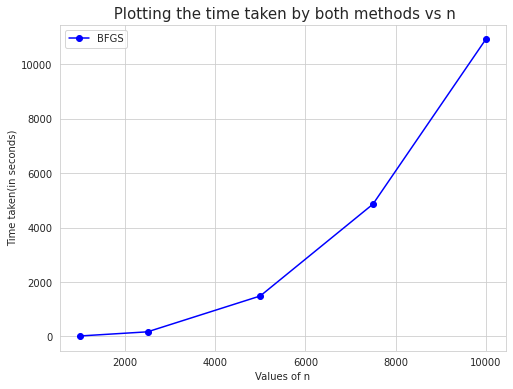

In [26]:
n = [1000, 2500, 5000, 7500, 10000]
plt.figure(figsize=(8,6))
plt.plot(n, times_bfgs, color = 'blue', marker = 'o' , label = 'BFGS Method')
plt.title(' Plotting the time taken by both methods vs n', fontsize = 15)
plt.xlabel('Values of n')
plt.ylabel('Time taken(in seconds)')
plt.legend(['BFGS','Newton'], loc = 'upper left')
plt.show()

# *Comment:*

Form the above graph, we can observe the following:
* As the number of variables increases, so does the time taken to find the minimizer for both the methods.
* The rate of increase on the time taken by both the methods is exponential to the number of variables.
* For all the values of $n$, the time taken by Newton's Method is very high than that of BFGS.
That's why we are unable to plot the graph for Newton's method.

Hence, we conclude that the BFGS method is useful only when the Hessian Matrix is not invertible.